In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pingouin as pg
from systole.detection import oxi_peaks, rr_artefacts

sns.set_context('talk')

Import summary statistics from Bayesian psychometric fits.

In [5]:
path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
bayesPsycho_df = pd.read_csv(path + '/data/bayesianPsychophysic.txt')

# Correlation between psi and Bayesian fit

## Threshold

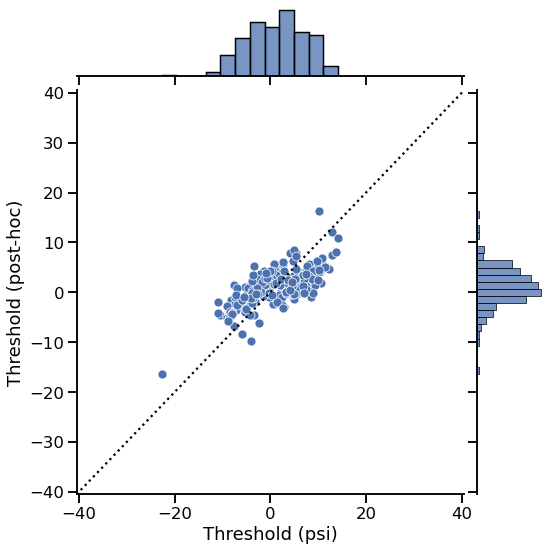

In [69]:
g = sns.jointplot(data=bayesPsycho_df[bayesPsycho_df.Condition=='Extero'],
                  x='Threshold', y='BayesianThreshold', xlim=(-40.5, 40.5),
                  ylim=(-40.5, 40.5), color='#4c72b0', height=8)
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, ':k')
g.ax_joint.set_ylabel('Threshold (post-hoc)')
g.ax_joint.set_xlabel('Threshold (psi)')
plt.savefig(path + '/figures/thresholdExtero.svg', dpi=300)

In [20]:
pg.corr(x=group_df[bayesPsycho_df.Condition=='Extero'].Threshold,
        y=group_df[bayesPsycho_df.Condition=='Extero'].BayesianThreshold, method='spearman')

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,216,0.675205,"[0.6, 0.74]",0.455902,0.450793,4.186557e-30,1.0


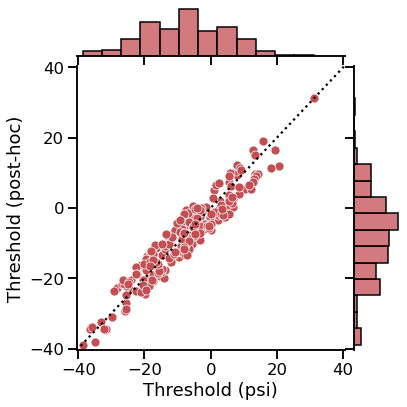

In [35]:
g = sns.jointplot(data=bayesPsycho_df[bayesPsycho_df.Condition=='Intero'], x='Threshold',
                  y='BayesianThreshold', xlim=(-40.5, 40.5), ylim=(-40.5, 40.5), color='#c44e52')
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, ':k')
g.ax_joint.set_ylabel('Threshold (post-hoc)')
g.ax_joint.set_xlabel('Threshold (psi)')
plt.savefig(path + '/figures/thresholdIntero.svg', dpi=300)

In [19]:
pg.corr(x=group_df[bayesPsycho_df.Condition=='Intero'].Threshold,
        y=group_df[bayesPsycho_df.Condition=='Intero'].BayesianThreshold, method='spearman')

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,217,0.948988,"[0.93, 0.96]",0.900577,0.899648,9.714394e-110,1.0


## Slope

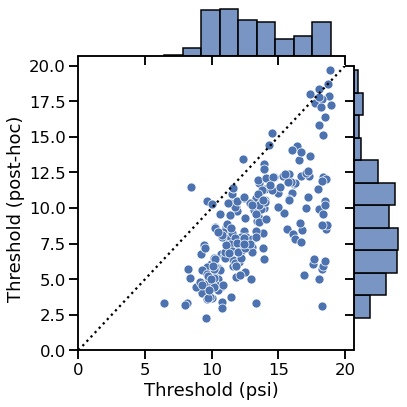

In [36]:
g = sns.jointplot(data=bayesPsycho_df[bayesPsycho_df.Condition=='Extero'], x='Slope',
                  y='BayesianSlope', xlim=(0, 20), ylim=(0, 20), color='#4c72b0')
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, ':k')
g.ax_joint.set_ylabel('Slope (post-hoc)')
g.ax_joint.set_xlabel('Slope (psi)')
plt.savefig(path + '/figures/slopeExtero.svg', dpi=300)

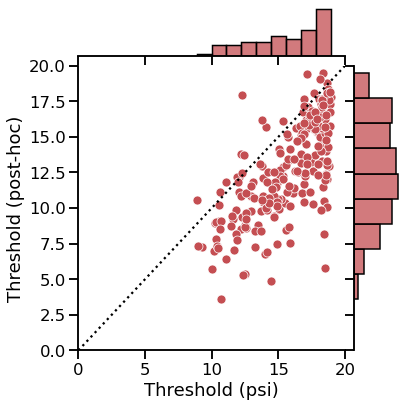

In [37]:
g = sns.jointplot(data=bayesPsycho_df[bayesPsycho_df.Condition=='Intero'], x='Slope',
                  y='BayesianSlope', xlim=(0, 20), ylim=(0, 20), color='#c44e52')
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, ':k')
g.ax_joint.set_ylabel('Slope (post-hoc)')
g.ax_joint.set_xlabel('Slope (psi)')
plt.savefig(path + '/figures/slopeIntero.svg', dpi=300)

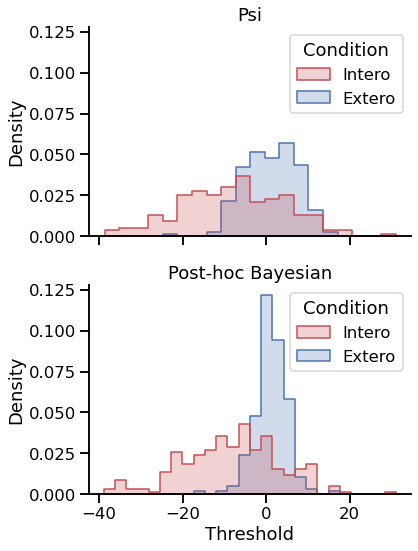

In [67]:
fig, axs = plt.subplots(2, 1, figsize=(6, 8), sharey=True, sharex=True)
sns.histplot(data=bayesPsycho_df, x='Threshold', hue='Condition', palette=['#c44e52', '#4c72b0'], ax=axs[0], common_norm=False, element="step", stat="density")
sns.histplot(data=bayesPsycho_df, x='BayesianThreshold', hue='Condition', palette=['#c44e52', '#4c72b0'], ax=axs[1], common_norm=False, element="step", stat="density")
axs[1].set_xlabel('Threshold')
axs[0].set_title('Psi')
axs[1].set_title('Post-hoc Bayesian')
plt.tight_layout()
sns.despine()
plt.savefig(path + '/figures/thresholdHist.svg', dpi=300)

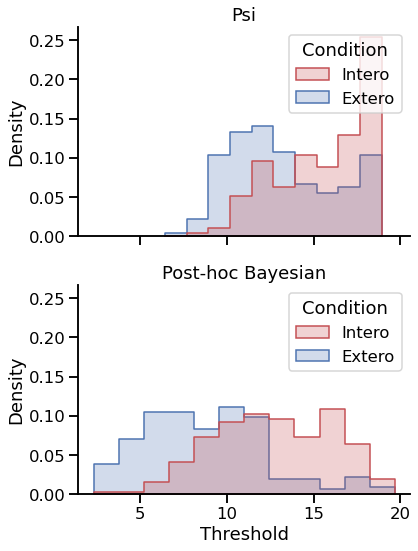

In [68]:
fig, axs = plt.subplots(2, 1, figsize=(6, 8), sharey=True, sharex=True)
sns.histplot(data=bayesPsycho_df, x='Slope', hue='Condition', palette=['#c44e52', '#4c72b0'], ax=axs[0], common_norm=False, element="step", stat="density")
sns.histplot(data=bayesPsycho_df, x='BayesianSlope', hue='Condition', palette=['#c44e52', '#4c72b0'], ax=axs[1], common_norm=False, element="step", stat="density")
axs[0].set_title('Psi')
axs[1].set_title('Post-hoc Bayesian')
axs[1].set_xlabel('Threshold')
plt.tight_layout()
sns.despine()
plt.savefig(path + '/figures/slopeHist.svg', dpi=300)